 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.



## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#describing the whale returns
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head(10)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls
#the function .isnull will count the nulls
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
#the function .dropna(inplace=True) will drop the nulls
whale_returns.dropna(inplace=True)
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#describing the algo_returns
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(10)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
print(algo_returns.isnull().sum())

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
print(algo_returns.isnull().sum())

Algo 1    0
Algo 2    0
dtype: int64



## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_csv = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#describing the algo_returns
sp500_csv.sort_index(ascending = True, inplace = True)
sp500_csv.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [9]:
# Check Data Types
sp500_csv.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#change data type "close" which is an object to a float
#use str.replace and .astype functions to change data type
sp500_csv["Close"]= sp500_csv["Close"].str.replace('$','').astype("float")
sp500_csv.sort_index(inplace = True)
sp500_csv

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_daily_returns= sp500_csv.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head(15)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [13]:
# Rename `Close` Column to be specific to this portfolio.
#use the .rename function 
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")
df_daily

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

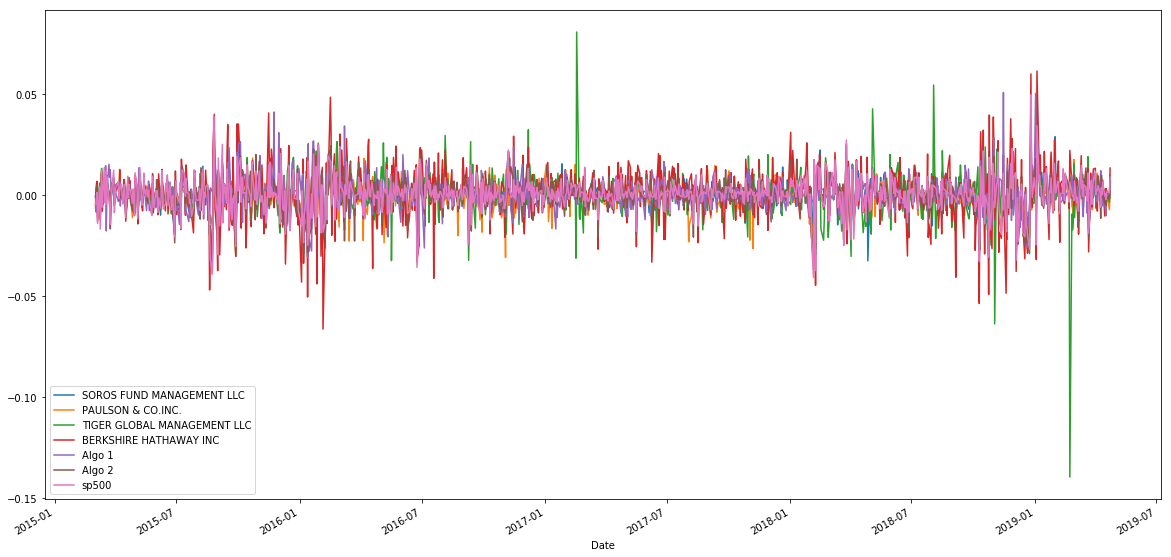

In [15]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

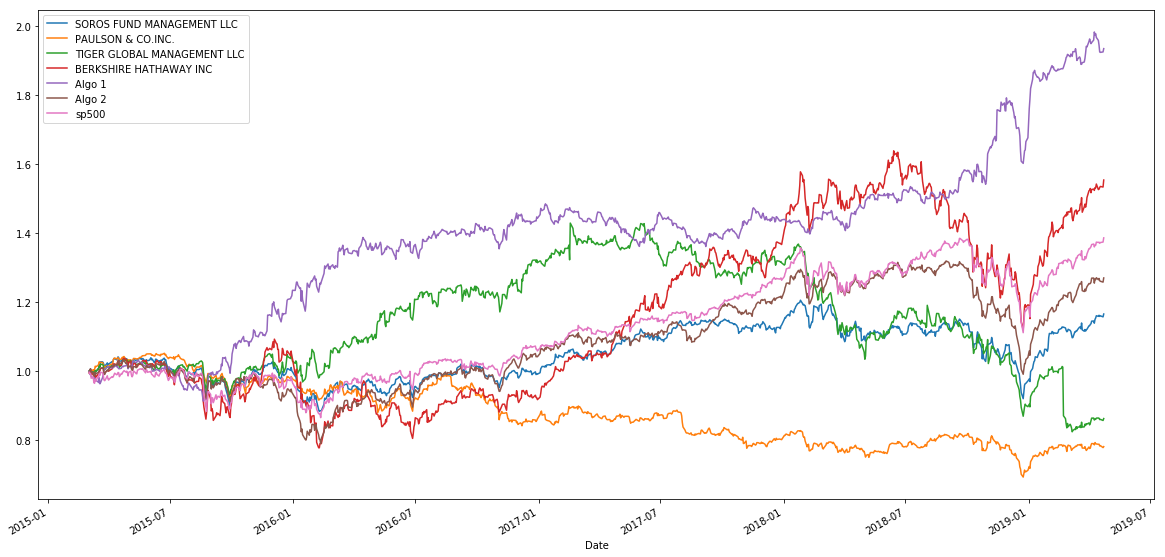

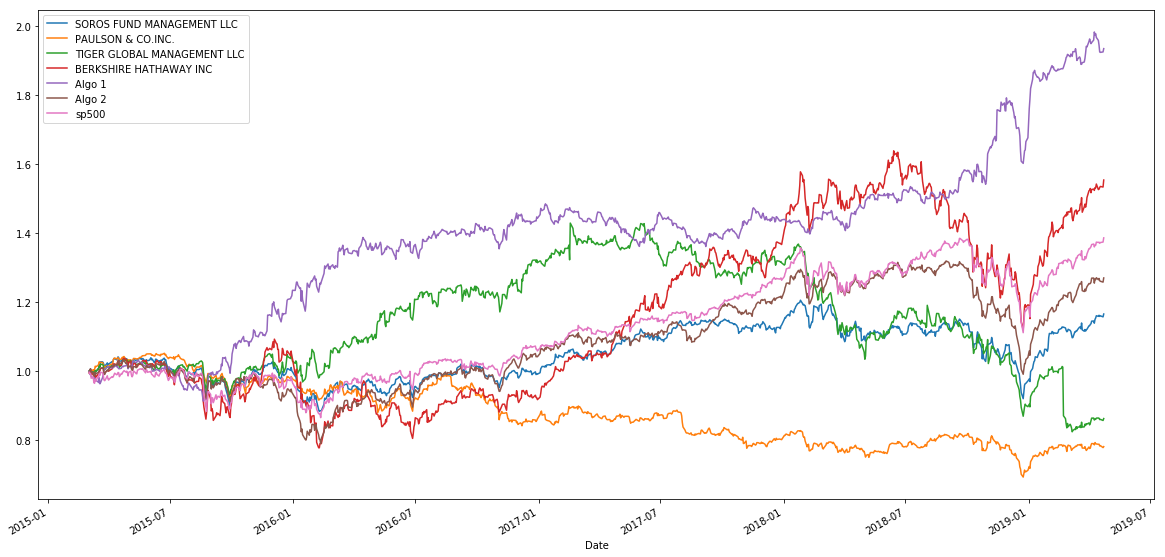

In [16]:
# Calculate cumulative returns of all portfolios
df_cum_returns= (1+ df_daily).cumprod()
df_cum_returns.plot(figsize = (20,10))

# Plot cumulative returns
df_cum_returns = (1+ df_daily).cumprod()
df_cum_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


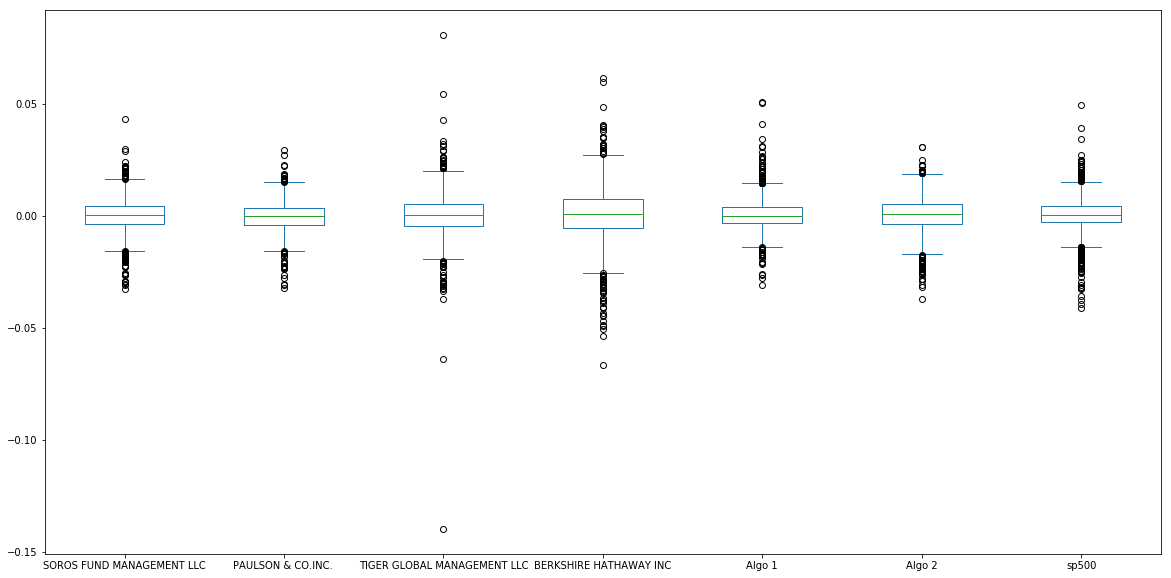

In [17]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std


,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Determine which portfolios are riskier than the S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std
#Tiger and BHI have higher volitility than SP500.

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std


,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

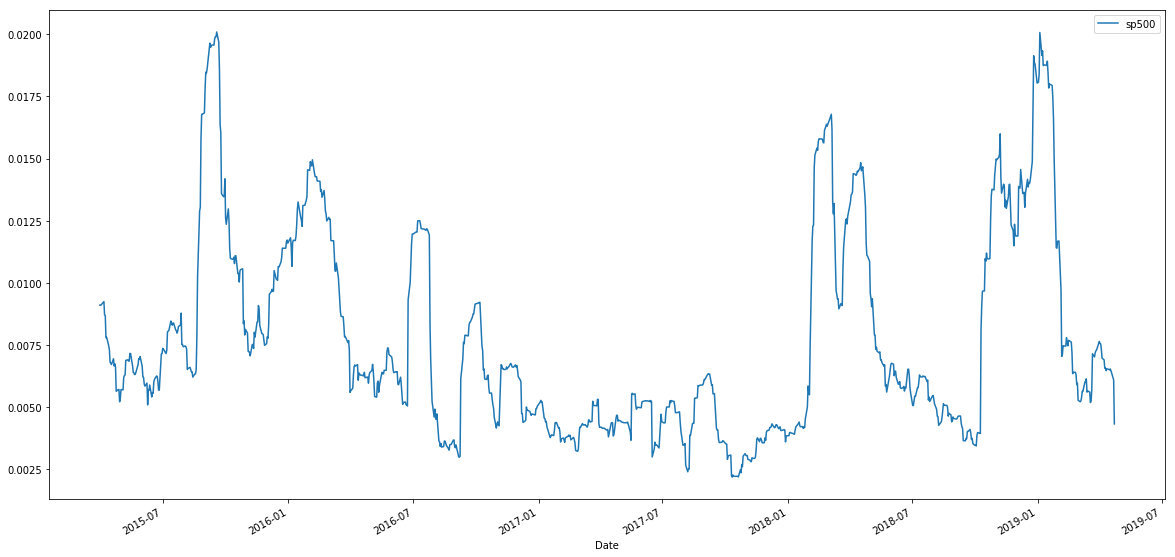

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()

# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

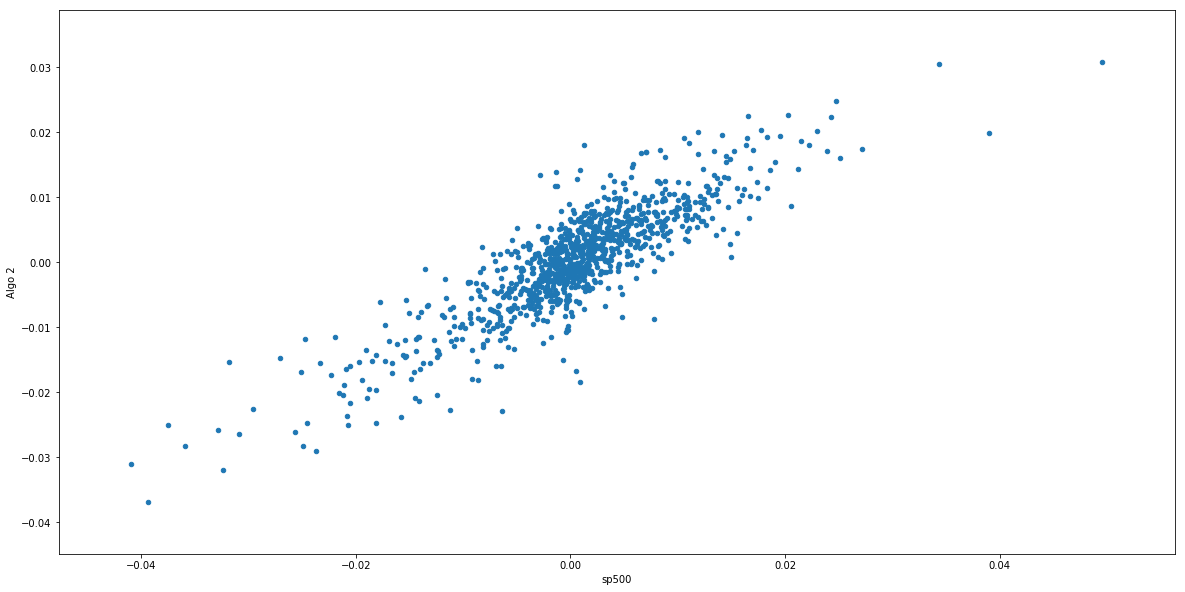

In [22]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))
#Algo 2 best mimic SP500 since it has the best correlation to SP500, as visualized in chart below.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

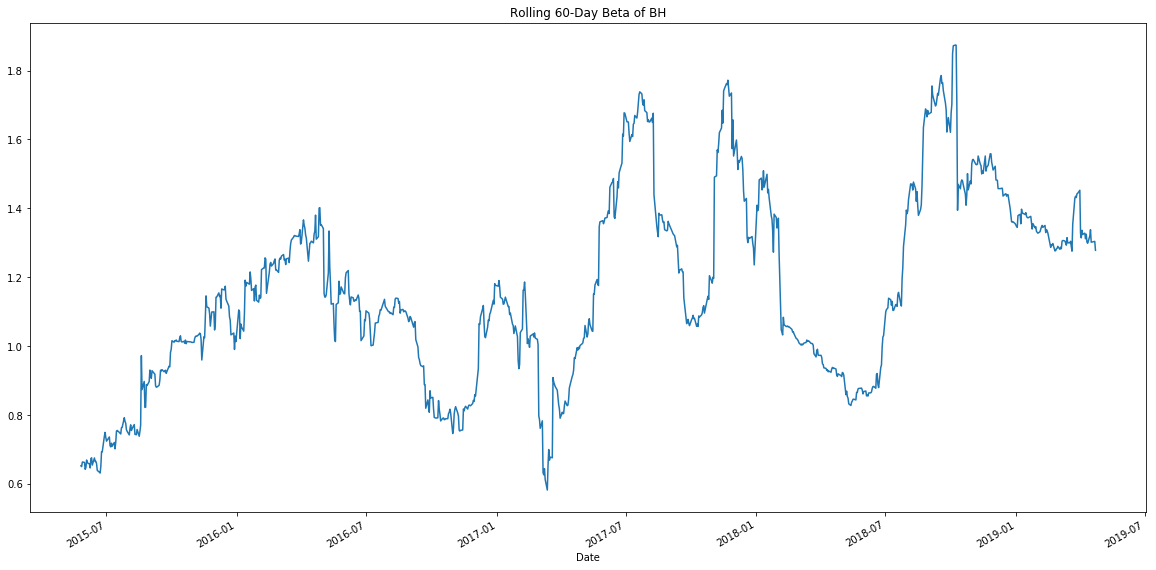

In [23]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])

# Calculate variance of S&P 500
rolling_variance = df_daily['sp500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

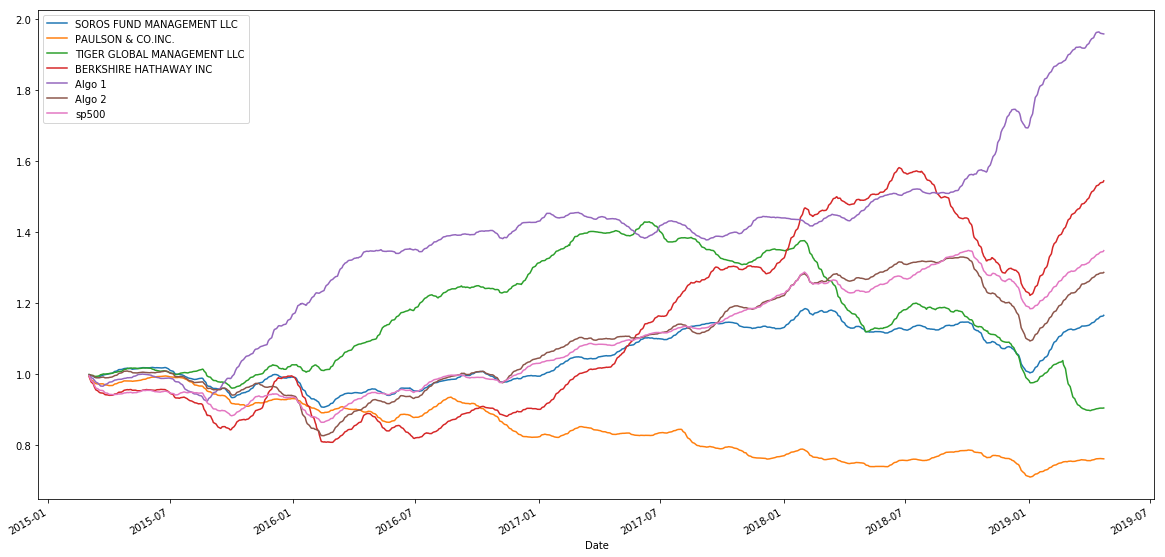

In [24]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

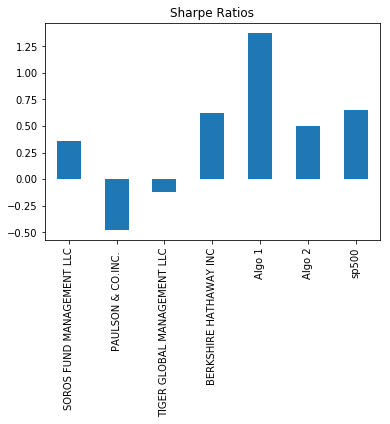

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed market and whales while algo 2 fell below market and BHI.



---


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated



## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_historical_csv = Path('Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_historical.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_historical.drop(columns=['AAPL1'], axis=1, inplace= True)
#aapl_historical.sort_index(ascending = True, inplace = True)
#aapl_historical.index.strftime('%m/%d/%Y')
aapl_historical.head(10)





,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
2019-05-02,209.15
2019-05-01,210.52
2019-04-30,200.67
2019-04-29,204.61


In [28]:
# Reading data from 2nd stock
goog_historical_csv = Path('Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_historical.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_historical.drop(columns=['GOOG1'], axis=1, inplace = True)
#goog_historical.sort_index(ascending = True, inplace = True)
#goog_historical.index.strftime('%m/%d/%Y')
goog_historical.head(10)

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
2019-05-02,1162.61
2019-05-01,1168.08
2019-04-30,1188.48
2019-04-29,1287.58


In [29]:
# Reading data from 3rd stock
cost_historical_csv = Path('Resources/cost_historical.csv')
cost_historical = pd.read_csv(cost_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_historical.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )   
cost_historical.drop(columns=['COST1'], axis=1, inplace = True)
#cost_historical.sort_index(ascending = True, inplace = True)
#cost_historical.index.strftime('%m/%d/%Y')
cost_historical.head(10)
                     


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
2019-05-02,242.69
2019-05-01,241.59
2019-04-30,245.53
2019-04-29,244.28


In [30]:
# Combine all stocks in a single DataFrame

df_daily_2 = pd.concat([aapl_historical, goog_historical, cost_historical], axis = "columns",join = "inner")
df_daily_2.head(10)

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
2019-05-02,209.15,1162.61,242.69
2019-05-01,210.52,1168.08,241.59
2019-04-30,200.67,1188.48,245.53
2019-04-29,204.61,1287.58,244.28


In [31]:
# Reset Date index
df_daily_2.reset_index(drop=True)
df_daily_2.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [32]:
# Reorganize portfolio data by having a column per symbol
#df_daily = df_daily.loc(columns=['AAPL', 'GOOG', 'COST'])

#df_daily
    

In [33]:
# Calculate daily returns
df_daily_returns = df_daily_2.pct_change()

# Drop NAs
df_daily_returns.dropna()

# Display sample data
df_daily_2.sort_index(ascending = True, inplace = True)
df_daily_returns.head()



,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights, # Calculate portfolio return, # Display sample data
weights = [1/3, 1/3, 1/3]
my_portfolio = df_daily_2.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()



Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
df_3 = pd.concat((my_portfolio_returns, df_daily ,), axis = 1, join='inner')
df_3.rename(columns= {0: "my_portfolio"}, inplace = True )
#df_3.dropna(inplace=True)
#df_3.sort_index()
#df_3.head()

df_3


,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df_3.dropna(inplace = True)
df_3

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
df_3_std = pd.DataFrame(df_3.std()).rename(columns = {0:"std"})
df_3_std


,std
my_portfolio,0.014413
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
sp500,0.009578


In [44]:
# Calculate the annualized `std`
df_3_annualized_std = df_3*np.sqrt(252)
df_3_annualized_std




,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.017346,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.246851,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.081592,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.037615,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.146808,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785
...,...,...,...,...,...,...,...,...
2019-04-16,0.048195,0.042852,0.006162,-0.013191,0.013282,-0.110244,0.046027,0.008086
2019-04-17,0.126391,-0.045984,-0.102663,-0.069998,0.051150,-0.163524,-0.082994,-0.036095
2019-04-18,0.009515,0.022985,0.019396,0.009232,0.030417,-0.009333,-0.019513,0.025067
2019-04-22,0.101214,-0.041047,-0.116402,-0.057787,-0.017268,0.010740,-0.030728,0.016066


### Calculate and plot rolling `std` with 21-day window

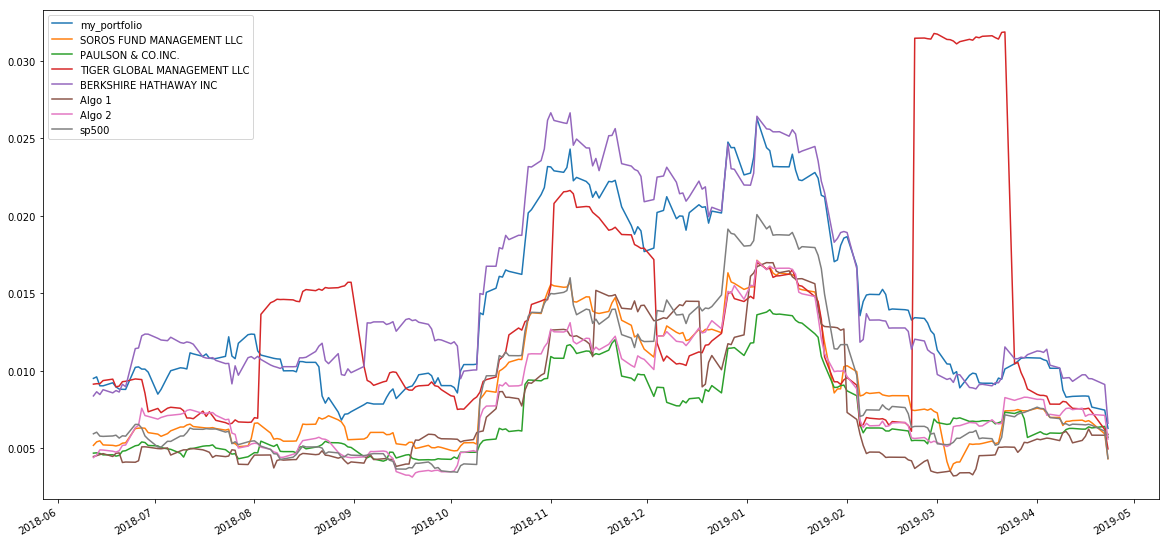

In [47]:
# Calculate rolling standard deviation
df_3_rolling_21 = df_3.rolling(window = 21).std()

# Plot the rolling standard deviation
df_3_rolling_21.plot(figsize = (20,10))


### Calculate and plot the correlation

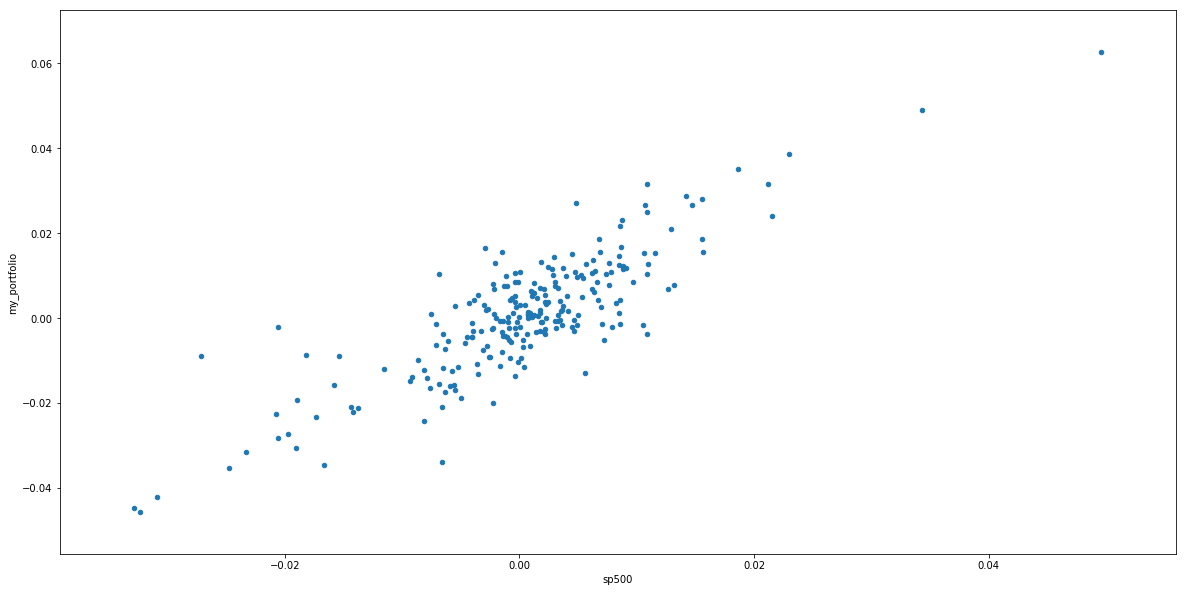

In [53]:
# Calculate and plot the correlation

correlation_df_3 = pd.DataFrame(df_3.corr()).loc[:,"sp500"]

correlation_df_3[correlation_df_3==correlation_df_3[correlation_df_3<1].max()]
# Display de correlation matrix
df_3.plot(kind="scatter", y = "my_portfolio", x = "sp500", figsize = (20,10))




### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

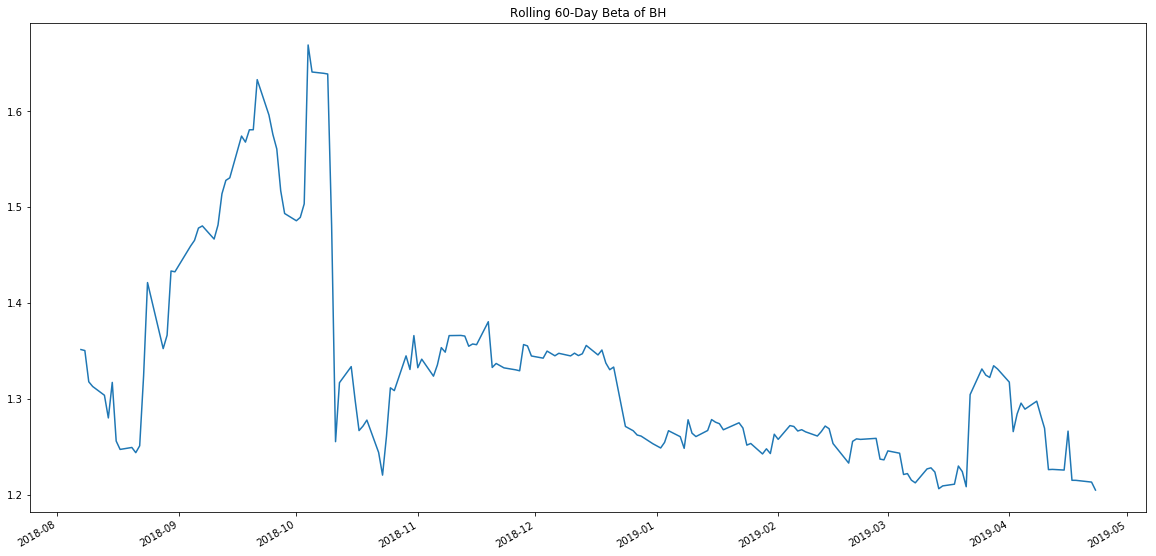

In [54]:
# Calculate and plot Beta
rolling_covariance_2 = df_3['my_portfolio'].rolling(window=60).cov(df_3['sp500'])

# Calculate variance of S&P 500
rolling_variance_2 = df_3['sp500'].rolling(window=60).var()

# Computing beta
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2

# Plot beta trend
rolling_beta_2.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = df_3.mean()*252/(df_3.std()*np.sqrt(252))
sharpe_ratios_2


my_portfolio                   0.797793
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
sp500                          0.584820
dtype: float64

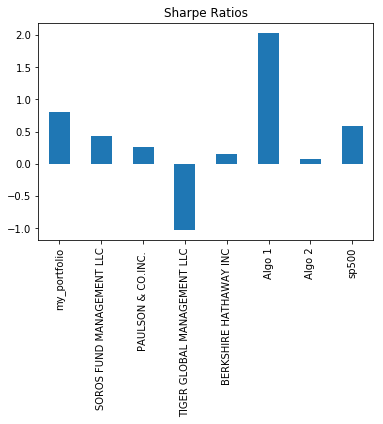

In [57]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = "bar", title = "Sharpe Ratios")



### How does your portfolio do?

Write your answer here!

In [58]:
##Compared to the Sp500 my portfolio does slightly better in regards to risk against but nonetheless both portfolios are less than 1 meaning the investement risk to expected return might not be wprth it. 